# 1- Extract all the text fields from the YELP dataset

In [3]:
import json

def extract(path):
    
    out_file = open("data/raw.txt", "w")
    f = open(path)
    out_file = open("data/raw.txt", "a")
    line = f.readline()
    f = open(path)

    i=1
    while line:
        try:
            
            #print line
            line = f.readline()
            review=json.loads(line)

            output = review["text"].lower()+'\n'
            out_file.write(output)

            '''if i==3:
                break
            i=i+1'''
    
        #in case there is a bad line in the file.
        except:
            continue
            
    out_file.close
    f.close

extract('data/yelp_academic_dataset_review_preprosessd.json')

# 2- Extract word frequecy dictionary

In [4]:
import nltk

#outputs a list of words from the whole text file.
def all_words(path):
    file = open(path, "r")
    text= ""
    for line in file: 
        text+=line
    words = nltk.tokenize.word_tokenize(text)
    
    return words

words = all_words("data/raw.txt")

In [5]:
import nltk

global words

#receives the path to read the text from and outputs its word frequency dict.
def word_freq(path):
    file = open(path, "r")
    text= ""
    for line in file: 
        text+=line

    words = nltk.tokenize.word_tokenize(text)
    dfist = nltk.FreqDist(words)
    
    return dfist


In [6]:
import heapq
from operator import itemgetter

#return most frequent 20 words
def top_20(path):
    freq_dict = word_freq(path)
    top_names = dict(heapq.nlargest(20, freq_dict.items(), key=itemgetter(1)))
    return top_names

print(top_20("data/raw.txt"))

{'.': 1430463, 'the': 1184492, ',': 870455, 'and': 819462, 'i': 790435, 'a': 623904, 'to': 603963, 'was': 400996, 'it': 363596, 'of': 351185, 'is': 316668, 'for': 295321, 'in': 282605, '!': 275151, 'my': 245307, 'that': 234197, 'they': 213290, 'you': 206806, 'this': 198061, 'with': 190478}


# 3- Remove stop words, tokenize, and postagging

In [11]:
# remove punctuation

def remove_punc(sentences):

    # define punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    
    no_punct = ""
    
    removed = []
    for s in sentences:
        for char in s:
            if char not in punctuations:
                no_punct = no_punct + char
        removed.append(no_punct)

    return removed


In [12]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk.data

#optional. I did not use it for this assignment as it was not stated in the sections
#remove stop words from the textfile after tokenizing them
def remove_stopwords(sentences):
    
    stop_words = set(stopwords.words('english')) 

    filtered_sentences = []
    for s in sentences:
        word_tokens = word_tokenize(s)
        f = [w for w in word_tokens if not w in stop_words]
        filtered_sentences.append(f) 
    

    return filtered_sentences

In [13]:
#input is the tokenised and empty of stop words dict. output is the pose tagged dict
def pos_tag(filtered_sentences):
    pos_tagged = []
    for s in filtered_sentences:
        pos_tagged.append(nltk.pos_tag(s))
        
    return pos_tagged


In [14]:
#first we separate sentences
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# remove punctuation from the string
fp = open("data/raw.txt")
data = fp.read()

sentences = tokenizer.tokenize(data)

#sentences = remove_punc(sentences)
filtered_sentences = remove_stopwords(sentences)
pos_tagged = pos_tag(filtered_sentences)


#sample of the outputs for the above functions
print(filtered_sentences[0])
print(pos_tagged[0])

['excellent', 'food', '.']
[('excellent', 'JJ'), ('food', 'NN'), ('.', '.')]


# 4-Plotting

In [17]:
import matplotlib.pyplot as plt
from math import log

#plot a bar with the given x and y values
def plotbar(x,y):

    y = [log(i) for i in y]

    plt.figure(figsize=(20,6))
    plt.bar(x,y,align='center', linewidth=-5)
    # A bar chart
    plt.xlabel('Bins')
    plt.ylabel('Frequency')

    plt.show()

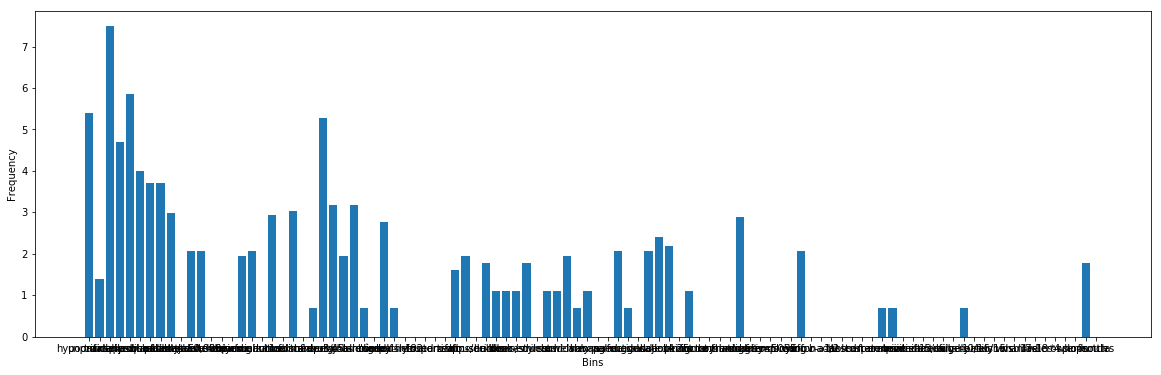

In [18]:
import random
import numpy as np

#Plot a histogram of the the frequencies of a random sample of tokens in the data(pick 100 tokens)

#random.seed(1)

choices = random.sample(set(words), 100)
freq_dict = word_freq("data/raw.txt")
values = [freq_dict.get(c) for c in freq_dict if c in choices]

x = choices
y = values
plotbar(x,y)

In [19]:
#exact values for the above histogram
for i,c in enumerate(choices):
    print(choices[i],values[i])
    

hypocritically 221
unparallelled 4
transpired 1794
diner-esque 110
pews 351
ixtapa-zihuatenejo 55
blacklist 41
reliably 41
back..asked 20
pebble/eastern 1
scottsdale-like 8
faux-stache-wearing 8
50,000/yr 1
cherries 1
up-dos 1
chimmichuri 7
immunization 8
beautiufl 1
locks.. 19
boudins 1
toolshed 21
extra..but 1
compels 2
careers/jobs 195
3:45 24
flavor-challenged 7
go-a-round 24
lancôme 2
blimpy 1
'seriously 16
loathes 2
self-infused 1
182 1
contorti 1
super-soft 1
nvfm 1
zealous 5
shin-sen 7
apps/drinks 1
hullo 6
e-book 3
d'moes 3
colors/styles 3
beer-educated 6
mirror 1
s.o.l 3
bowels 3
amicably 7
lvrm 2
havana 3
enraged 1
palma 1
perfections 8
rugged 2
uneducated 1
haji 8
salsa-looking 11
declarant 9
4.25 1
perfuctory 3
inmans 1
sure.that 1
st.franis 1
bomb-diggity 1
mordici 18
mastros 1
address=5055 1
friends.we 1
employing 1
romanov 1
doc.. 8
chiffonades 1
b-a-b 1
1/2 1
tabled 1
scan 1
testosterone 1
corporate.i 1
fraternize 2
embroiled 2
mornin 1
quinceanera 1
satisfactorily 1
1

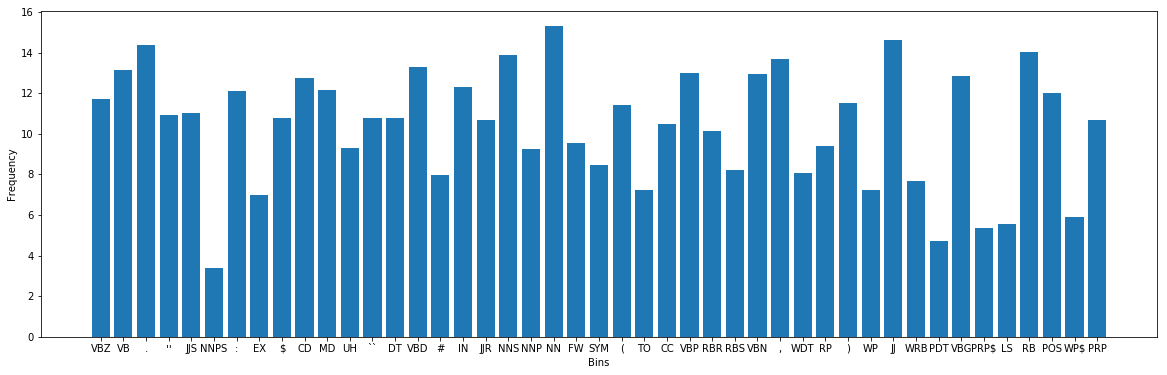

In [20]:
# Plot a histogram of the frequencies of all the pos tags assigned by the tagger. 

pos_taggs = []
for x in pos_tagged:
    temp = [i[1] for i in x]
    pos_taggs.extend(temp)

count_dict = [[x,pos_taggs.count(x)] for x in set(pos_taggs)]
x  = [i[0] for i in count_dict]
y  = [i[1] for i in count_dict]

plotbar(x, y)

In [21]:
#exact values for the above histogram
for i,_ in enumerate(x):
    print(x[i],y[i])

VBZ 124590
VB 502000
. 1756678
'' 55151
JJS 61289
NNPS 29
: 185165
EX 1089
$ 47839
CD 344127
MD 194107
UH 11151
`` 48445
DT 48872
VBD 598660
# 2946
IN 224367
JJR 43712
NNS 1059133
NNP 10627
NN 4403893
FW 13920
SYM 4727
( 91438
TO 1377
CC 34896
VBP 447844
RBR 25739
RBS 3734
VBN 411735
, 870455
WDT 3211
RP 12053
) 100229
WP 1349
JJ 2211530
WRB 2119
PDT 112
VBG 387097
PRP$ 216
LS 253
RB 1230242
POS 160733
WP$ 373
PRP 43771


In [22]:
count_jj = [[x,pos_taggs.count(x)] for x in set(pos_taggs) if x== 'JJ']
print(count_jj)

[['JJ', 2211530]]


In [26]:
#Print the top 20 adjectives in the data. 
import heapq 
def top20_adj(pos_tagged):
    
    adjectives = []
    for x in pos_tagged:
        adjectives.extend([w for w,pos in x if pos=='JJ'])
        
    count_adj = [[x,adjectives.count(x)] for x in set(adjectives)]
    top_adj = dict(heapq.nlargest(20, count_adj, key=itemgetter(1)))
    return(top_adj)

top_adj = top20_adj(pos_tagged)
print(top_adj)

{'good': 102947, 'great': 89375, 'nice': 30612, 'little': 30265, 'new': 23617, 'bad': 21081, 'much': 20513, 'many': 19047, 'last': 18846, 'delicious': 18447, 'sure': 18013, 'next': 16887, 'first': 16458, 'small': 15917, 'fresh': 15606, 'happy': 15604, 'big': 15477, 'hot': 14466, 'friendly': 14321, 'old': 13962}


In [27]:
#Print the top 20 proper nouns in the data. 
def top20_proper_nouns(pos_tagged):
    proper_nouns = []
    for x in pos_tagged:
        proper_nouns.extend([w for w,pos in x if pos=='NNP'])
    count_proper_nouns = [[x,proper_nouns.count(x)] for x in set(proper_nouns)]
    top_proper_nouns = dict(heapq.nlargest(20, count_proper_nouns, key=itemgetter(1)))
    return(top_proper_nouns)

print(top20_proper_nouns(pos_tagged))

{'+': 573, '/': 547, '..': 528, '=': 495, '@': 359, ']': 255, '[': 224, '*': 203, 'know': 151, '.i': 126, 'kitchen': 126, '~': 115, 'zucchini': 114, 'x': 106, '.and': 96, 'kinda': 65, "'d": 56, "'n": 55, '.the': 47, '.well': 46}


# 5- Train a word2vec model 

There are 4 parameters which we need to take care of: 

1- Size: The size of the dense vector to represent each token or word. In this model we have lots of data and its good to experiment with various sizes. But for smal data, the size should be a smaller value.

2- Window: The maximum distance between the target word and its neighboring word. if the data is not sparse, window size should not matter too much. In general, a smaller window size should give you terms that are more related. So we try to have smaller sized windows in our experiments.

3- min_count: it gets rid of the words which are not repeated more that the min_count value as they are not important to the whole doc. This parameter mostly affects memory usage.

4- workers: its about how many threads to use. We do not need to tune this parameter.

I decided to pick min_count=3 because there were were a lot of words with the frequency of lower than 5. I used the size=100 as it is reasonable for large data, and window size of 5 because of the medium length of the sentences.

In [28]:
import gensim

model = gensim.models.Word2Vec(filtered_sentences, min_count=3, window=5,  size=100)

In [30]:

for a in top_adj.keys():
    
    print('most similar to {}:'.format(a))
    print(model.most_similar(a, topn=3))



most similar to good:
[('decent', 0.8376259803771973), ('great', 0.7848733067512512), ('awesome', 0.6877490282058716)]
most similar to great:
[('awesome', 0.8533113598823547), ('fantastic', 0.8317754864692688), ('excellent', 0.8170826435089111)]
most similar to nice:
[('cool', 0.7047579288482666), ('pleasant', 0.6458733081817627), ('great', 0.6324647665023804)]
most similar to little:
[('bit', 0.8481577634811401), ('tad', 0.741314172744751), ('lil', 0.7163258790969849)]
most similar to new:
[('current', 0.531875491142273), ('-365', 0.4822043478488922), ('newest', 0.4715840220451355)]
most similar to bad:
[('terrible', 0.7182955741882324), ('horrible', 0.7127516865730286), ('awful', 0.6348364949226379)]
most similar to much:
[('actually', 0.6212020516395569), ('lot', 0.5517786741256714), ('alot', 0.5382863283157349)]
most similar to many:
[('numerous', 0.820077657699585), ('several', 0.8183917999267578), ('multiple', 0.788356363773346)]
most similar to last:
[('first', 0.683967232704162

/home/borna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/home/borna/.local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
